In [1]:
%load_ext autoreload
%autoreload 2
%cd "/home/jorgen/deepshape/deepshape"

/home/jorgen/deepshape/deepshape


In [2]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from curves import *
from layers import *
from visual import *
from networks import ReparametrizationNetwork1D, train

In [13]:
# Figures folder
figdir = "/home/jorgen/deepshape/figures/"

# Instantiate curves and transforms (from curves library)
g = LogStepDiff
c1 = Circle
c2 = c1.compose(g)

# Take Qmaps
q, r = Qmap(c2), Qmap(c1)

[Iter     1] loss: 2.80092
[Iter    11] loss: 0.98086
[Iter    21] loss: 0.57676
[Iter    31] loss: 0.34252
[Iter    41] loss: 0.21695
[Iter    51] loss: 0.13579
[Iter    61] loss: 0.08282
[Iter    71] loss: 0.04934
[Iter    81] loss: 0.02887
[Iter    91] loss: 0.01671
[Iter   101] loss: 0.00968
[Iter   111] loss: 0.00570
[Iter   121] loss: 0.00349
[Iter   131] loss: 0.00226
[Iter   141] loss: 0.00158
[Iter   151] loss: 0.00119
[Iter   161] loss: 0.00096
[Iter   171] loss: 0.00082
[Iter   181] loss: 0.00072
[Iter   191] loss: 0.00066
[Iter   201] loss: 0.00061
[Iter   211] loss: 0.00057
[Iter   221] loss: 0.00054
[Iter   231] loss: 0.00052
[Iter   241] loss: 0.00049
[Iter   251] loss: 0.00048
[Iter   261] loss: 0.00046
[Iter   271] loss: 0.00045
[Iter   281] loss: 0.00044
[Iter   291] loss: 0.00043

Finished training in 1.42353s


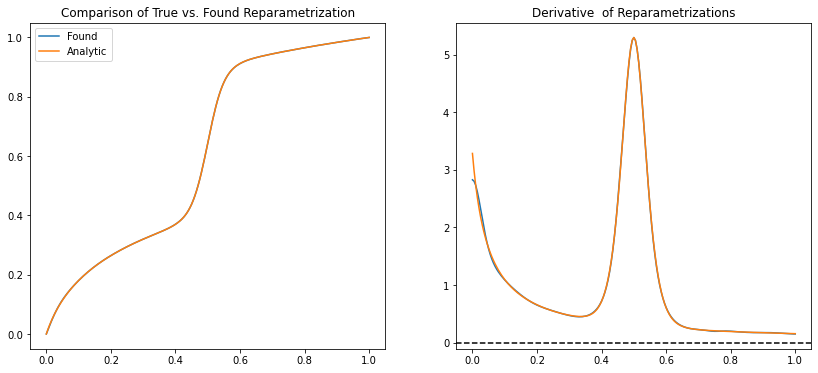

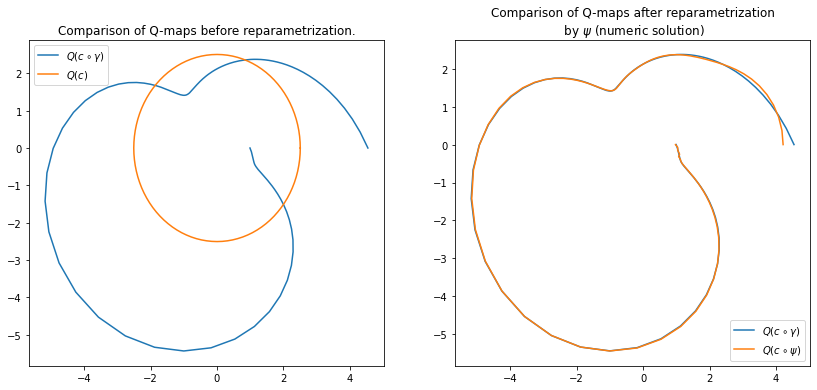

In [15]:
# Build network of L layers with N_l basis functions per layer
RN = ReparametrizationNetwork1D(5, [1, 5, 10, 15, 20])
RN = ReparametrizationNetwork1D(5, 10)

# Choose and configure optimizer.
# opt = optim.Adam(RN.parameters(), lr=1e-5)
opt = optim.SGD(RN.parameters(), lr=1e-4, momentum=0.3)
train(q, r, RN, opt, iterations=300)

# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 201).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# Plot Diffeomorphism...
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x, z, label="Found")
plt.plot(x, g(x), label="Analytic")
plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()

# ... and derivative to check if strictly positive
plt.subplot(1, 2, 2)
plt.plot(x, y, label="Found")
plt.plot(x, g.derivative(x), label="Analytic")
plt.axhline(0, ls='--', c='k')
plt.title("Derivative  of Reparametrizations")
plt.savefig(figdir + "reparametrizations.png")
plt.show()


# Plot Q-maps, and compare 
plt.figure(figsize=(14, 6))

# Before 
plt.subplot(1, 2, 1)
plt.plot(q(x)[:, 0], q(x)[:, 1], label="$Q(c \circ \gamma)$")
plt.plot(r(x)[:, 0], r(x)[:, 1], label="$Q(c)$")
plt.title("Comparison of Q-maps before reparametrization.")
plt.legend()

# .. and after reparametrization
plt.subplot(1, 2, 2)
plt.plot(Q[:, 0], Q[:, 1], label="$Q(c \circ \gamma)$")
plt.plot(R[:, 0], R[:, 1], label="$Q(c \circ \psi)$")
plt.title("Comparison of Q-maps after reparametrization\n by $\psi$ (numeric solution)")
plt.legend()
plt.savefig(figdir + "qmaps.png")

plt.show()